<a href="https://colab.research.google.com/github/seunghee0518/python_colab/blob/main/sklearn_decisiontree%5Bdata_iris%2Ctitanic%2Ctennis%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#iris by entropy

In [ ]:
#기본적인 패키지
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#데이터 가져오기
from sklearn.datasets import load_iris

# 붓꽃 데이터 -> data/ target -> y / 에 저장함
data = load_iris()

#data.target -> 타겟 데이터를 저장함
y = data.target

#data.data[전체, 세번째에서 마지막]
X = data.data[:, 2:]

#4가지 데이터중 마지막 2개의 데이터(꽃잎길이, 꽃잎넓이)만 씀
feature_names = data.feature_names[2:]

#의사결정트리함수 불러오기
from sklearn.tree import DecisionTreeClassifier

#불순도는 엔트로피방식으로, 학습단계는 1까지, 랜덤하지 않게 학습해라
# 1단계만 학습하는 모델
iris_tree1 = DecisionTreeClassifier(criterion = 'entropy', max_depth=1, random_state=0).fit(X, y)

In [ ]:
#의사결정트리를 시각화하기위해 모듈 가져오기
#draw_decision_tree 함수는 의사결정나무의 의사 결정 과정의 세부적인 내역을 다이어그램으로 보여주고
#plot_decision_regions 함수는 이러한 의사 결정에 의해 데이터의 영역이 어떻게 나뉘어졌는지를 시각화함
import io
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz

In [ ]:
# 시각화 하기위해 함수 만들기1
#draw_decision_tree 함수는 의사결정나무의 의사 결정 과정의 세부적인 내역을 다이어그램으로 보여주고
# io.StringIO : 문자열을 텍스트파일로 취급함: 바이트배열을 이진파일로 변경
#getvalue(값목록; 값번호) : 값 목록에서 값 번로로 제공된 요청 값을 반환함
def draw_decision_tree(model):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)

In [ ]:
# 시각화 하기위해 함수 만들기2
#plot_decision_regions 함수는 이러한 의사 결정에 의해 데이터의 영역이 어떻게 나뉘어졌는지를 시각화함
def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors)

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = model.predict(
        np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)

    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=[cmap(idx)], marker=markers[idx], s=80, label=cl)

    plt.xlabel(data.feature_names[2])
    plt.ylabel(data.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)

    return Z

## 1단계 의사결정트리

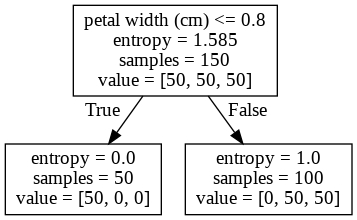

In [ ]:
#트리 그려보기
draw_decision_tree(iris_tree1)

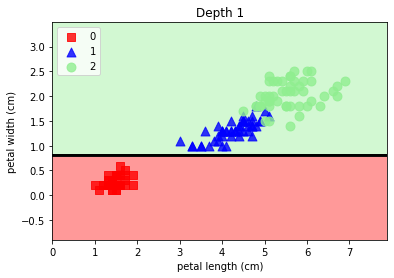

In [ ]:
#데이터 영역 보기 : 1단계
plot_decision_regions(X, y, iris_tree1, "Depth 1")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, iris_tree1.predict(X))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0, 50,  0]])

## 2단계 의사결정트리

In [ ]:
# 2단계 학습하는 모델 만들기
iris_tree2 = DecisionTreeClassifier(
    criterion='entropy', max_depth=2, random_state=0).fit(X, y)

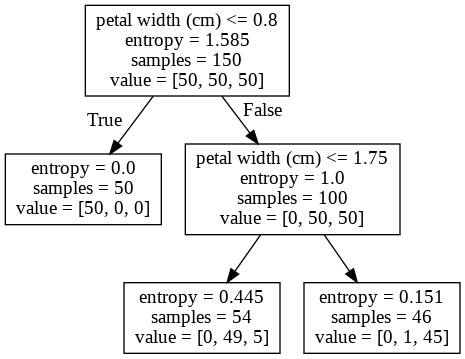

In [ ]:
draw_decision_tree(iris_tree2)

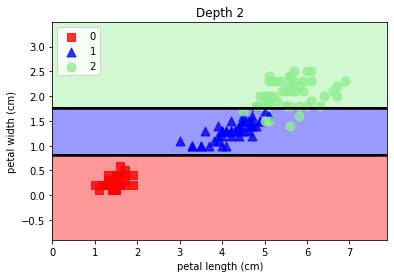

In [ ]:
plot_decision_regions(X, y, iris_tree2, "Depth 2")
plt.show()

In [ ]:
confusion_matrix(y, iris_tree2.predict(X))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]])

## 3단계 의사결정트리

In [ ]:
#3단계로 모델만들기
iris_tree3 = DecisionTreeClassifier(
    criterion='entropy', max_depth=3, random_state=0).fit(X, y)

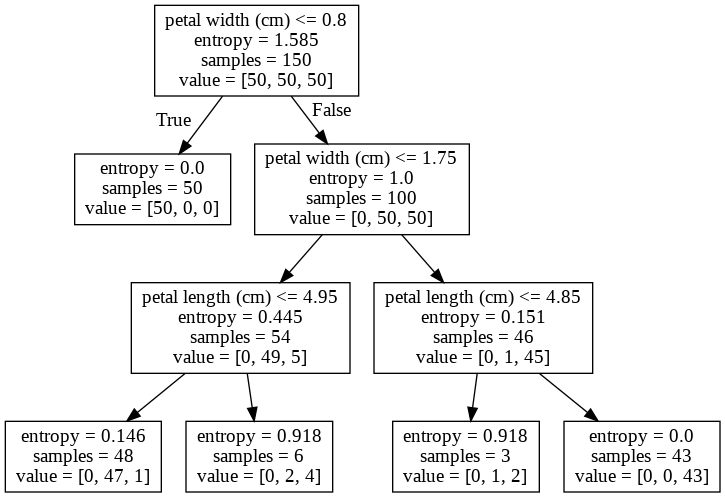

In [ ]:
draw_decision_tree(iris_tree3)

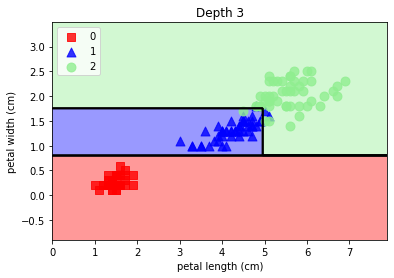

In [ ]:
plot_decision_regions(X, y, iris_tree3, "Depth 3")
plt.show()

In [ ]:
confusion_matrix(y, iris_tree3.predict(X))

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]])

## 4단계 의사결정트리

In [ ]:
# 4단계로 학습한 모델
iris_tree4 = DecisionTreeClassifier(
    criterion='entropy', max_depth=4, random_state=0).fit(X, y)

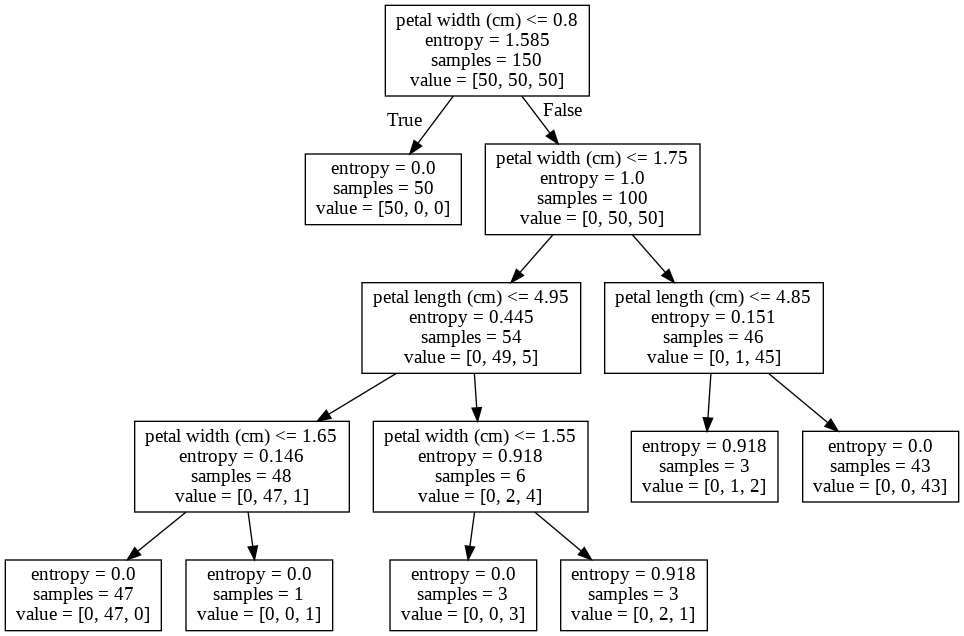

In [ ]:
draw_decision_tree(iris_tree4)

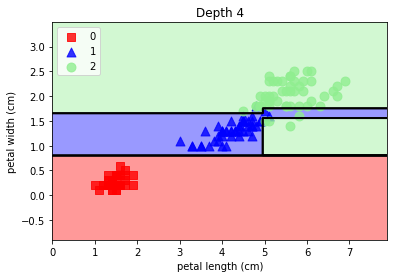

In [ ]:
plot_decision_regions(X, y, iris_tree4, "Depth 4")
plt.show()

In [ ]:
confusion_matrix(y, iris_tree4.predict(X))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  1, 49]])

## 5단계 의사결정트리

In [ ]:
# 5단계만 학습하는 의사결정트리
iris_tree5 = DecisionTreeClassifier(
    criterion='entropy', max_depth=5, random_state=0).fit(X, y)

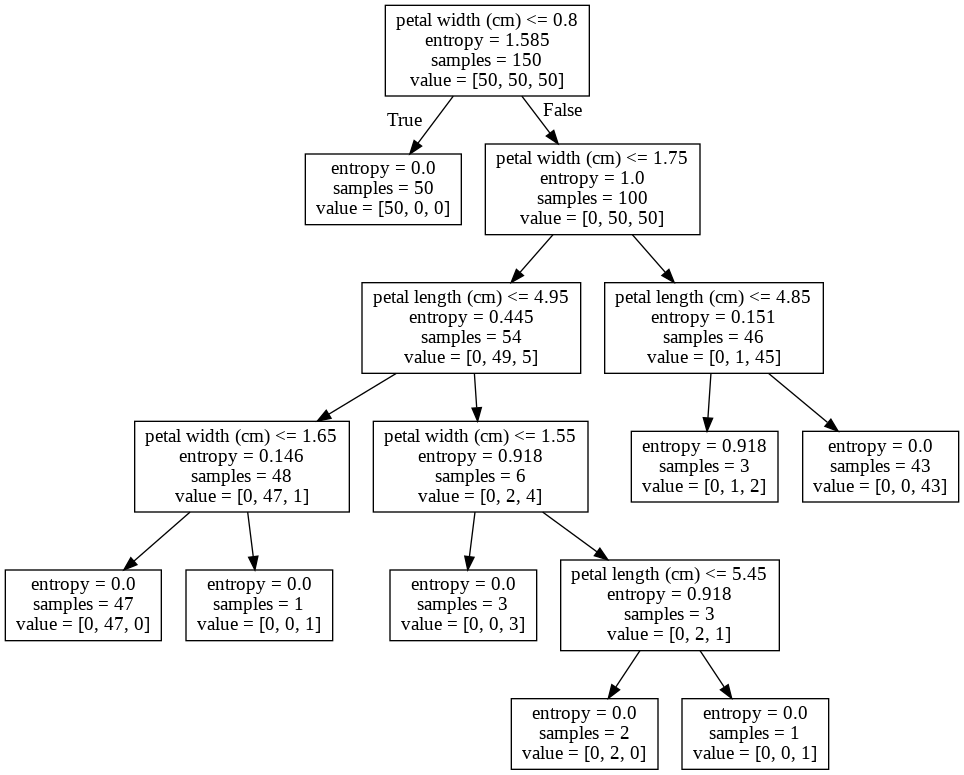

In [ ]:
draw_decision_tree(iris_tree5)

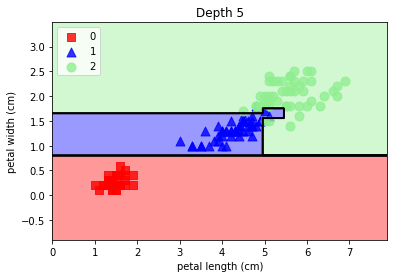

In [ ]:
plot_decision_regions(X, y, iris_tree5, "Depth 5")
plt.show()

In [ ]:
confusion_matrix(y, iris_tree5.predict(X))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  0, 50]])

## 3단계 의사결정모델 & 정확도 계산

In [ ]:
#max_depth=3인 의사결정나무 모형을 만들고 정확도(accuracy)를 계산함
from sklearn.datasets import load_iris

iris = load_iris()
X1 = iris.data
y1 = iris.target
X1 = X1[:, :2]

from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier(max_depth=3).fit(X1, y1)
y1_pred = model1.predict(X1)

from sklearn.metrics import accuracy_score

print('model1의 정확도')
accuracy_score(y1, y1_pred)

model1의 정확도


0.8133333333333334

In [ ]:
#K=5 인 교차 검증을 통해 테스트 성능 평균을 측정함
from sklearn.model_selection import cross_val_score

print('교차검증을 통한 테스트 성능 평균')
cross_val_score(model1, X1, y1, scoring="accuracy", cv=5).mean()

교차검증을 통한 테스트 성능 평균


0.7466666666666666

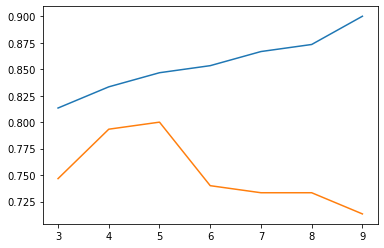

In [ ]:
#max_depth 인수를 바꾸어 가면서 테스트 성능 평균을 구하여 cross validation curve를 그리고 가장 테스트 성능 평균이 좋은 max_depth 인수 찾기
mean_test_accuracy = []
train_accuracy = []
for max_depth in np.arange(3, 10):
    model1 = DecisionTreeClassifier(max_depth=max_depth).fit(X1, y1)
    train_accuracy.append(accuracy_score(y1, model1.predict(X1)))
    mean_test_accuracy.append(cross_val_score(model1, X1, y1, scoring="accuracy", cv=5).mean())
    
    
plt.plot(np.arange(3, 10), train_accuracy)
plt.plot(np.arange(3, 10), mean_test_accuracy)
plt.show()

#titanic data by gini

In [ ]:
#import titanic data
import pandas as pd
titanic_train_url ='https://raw.githubusercontent.com/gilbutITbook/080263/master/chap3/data/titanic/train.csv' 
df = pd.read_csv(titanic_train_url, index_col = 'PassengerId')
print(df.head())

             Survived  Pclass  ... Cabin Embarked
PassengerId                    ...               
1                   0       3  ...   NaN        S
2                   1       1  ...   C85        C
3                   1       3  ...   NaN        S
4                   1       1  ...  C123        S
5                   0       3  ...   NaN        S

[5 rows x 11 columns]


In [ ]:
#preproccesing
df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
df['Sex'] = df['Sex'].map({'male' : 0, 'female': 1})
df = df.dropna() # delete null
X = df.drop('Survived', axis = 1)
y = df['Survived'] #pridiction lavel

In [ ]:
#split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [ ]:
#create model
from sklearn import tree
titanic_model = tree.DecisionTreeClassifier()


In [ ]:
#training model
titanic_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#predict X_test & accuracy 
y_predict = titanic_model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.8156424581005587

In [ ]:
#confusion_matrix(=오분류표)
from sklearn.metrics import confusion_matrix
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns = ['Predicted Not Survival', 'Predicted Survival'],
    index = ['True Not Survival', 'True Survival']
)

,Predicted Not Survival,Predicted Survival
True Not Survival,97,15
True Survival,18,49


# tennis data[catagorical data] by gini

In [7]:
#import library
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

from IPython.display import Image
import numpy as np
import pandas as pd
import io
import pydotplus
import os

In [9]:
#import data
tennis_url = 'https://raw.githubusercontent.com/seunghee0518/python_colab/main/data%20files/play_tennis.csv'
tennis = pd.read_csv(tennis_url)

In [10]:
#preprocessing columns & node value: string -> int
#step1 node
tennis.Outlook = tennis.Outlook.replace('Sunny', 0)
tennis.Outlook = tennis.Outlook.replace('Overcast', 1)
tennis.Outlook = tennis.Outlook.replace('Rain', 2)

#step2 node
tennis.Temperature = tennis.Temperature.replace('Hot', 3)
tennis.Temperature = tennis.Temperature.replace('Mild', 4)
tennis.Temperature = tennis.Temperature.replace('Cool', 5)

#step3 node
tennis.Humidity = tennis.Humidity.replace('High', 6)
tennis.Humidity = tennis.Humidity.replace('Normal', 7)

#step4 node
tennis.Wind = tennis.Wind.replace('Weak', 8)
tennis.Wind = tennis.Wind.replace('Strong', 9)

#step5 node
tennis.PlayTennis = tennis.PlayTennis.replace('No', 10)
tennis.PlayTennis = tennis.PlayTennis.replace('Yes', 11)

tennis

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,0,3,6,8,10
1,0,3,6,9,10
2,1,3,6,8,11
3,2,4,6,8,11
4,2,5,7,8,11
5,2,5,7,9,10
6,1,5,7,9,11
7,0,4,6,8,10
8,0,5,7,8,11
9,2,4,7,8,11


In [11]:
#preprocessing data
X = np.array(pd.DataFrame(tennis, columns = ['Outlook', 'Temperature', 'Humidity', 'Wind']))
y = np.array(pd.DataFrame(tennis, columns = ['PlayTennis']))

In [12]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [15]:
#create decisiontree model
DTC = DecisionTreeClassifier()
tennis_model = DTC.fit(X_train, y_train)

In [19]:
#predict test data
tennis_pred = tennis_model.predict(X_test)

#confusion matrix
print(confusion_matrix(y_test, tennis_pred))

[[0 2]
 [1 1]]


In [18]:
#evaluate model
print(classification_report(y_test, tennis_pred))

              precision    recall  f1-score   support

          10       0.00      0.00      0.00         2
          11       0.33      0.50      0.40         2

    accuracy                           0.25         4
   macro avg       0.17      0.25      0.20         4
weighted avg       0.17      0.25      0.20         4



In [24]:
#visualization by graph : preprocessing
#dynamic allocation
#그래프를 표현하는 graphviz소프트웨어를 설치한후 트리표현함수를 사용함
#설치된 경로를 os모듈중 경로구분기호를 반환하는 함수인 os.pathsep을 이용해 환경변수들을 나타내는 사전 함수인 os.environ['PATH']에 동적으로 할당함
os.environ['PATH'] += os.pathsep + 'C:/Program Files/Graphviz 2.44.1/bin/'

#columns
feature_names = tennis.columns.tolist() #columns -> list
feature_names = feature_names[0:4] #slicing

#target class
target_names = np.array(['Play No', 'Play Yes'])

feature_names
target_names

array(['Play No', 'Play Yes'], dtype='<U8')

In [22]:
#visualization by graph
#decision tree representation by dot-fromat
dot = tree.export_graphviz(DTC,
                           out_file = None,
                           feature_names = feature_names,
                           class_names = target_names,
                           filled = True,
                           rounded = True,
                           special_characters = True)

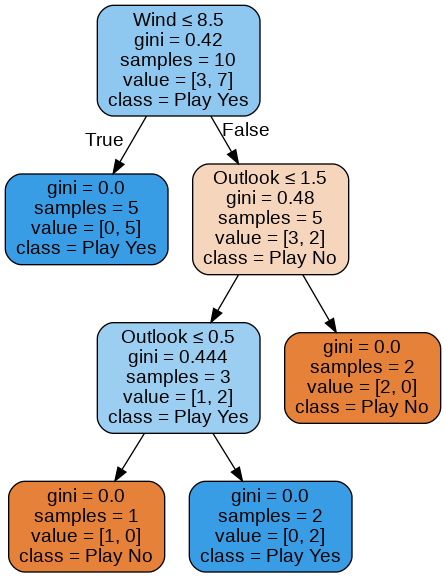

In [23]:
#load graph(by dot-format) & input function(Graph_from_dot_data)
dot_graph = pydotplus.graph_from_dot_data(dot)

#graph by Image module
Image(dot_graph.create_png())